Hello!
I'm happy to review your project today.
When I see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-success">
    
<b>General feedback</b> <a class="tocSkip"></a>
    
Hi, Collin

    
I am happy to review your project today

    
There are many things that I like
    
- great data preprocessing
- nice code for hypotheses testing
- all calculations are correct
- super visualizations
- great structure of the project
- I realy like your conclusions with insights based on data

    
<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There are some issues that need to be fixed
    
- please add some missing visualizations
- use relevant period in all further steps on your analysis
- fill in missing values for rating and drop rows with missing values in genres, names and year of release

    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>General feedback v2</b> <a class="tocSkip"></a>
    
Hi, Collin

Thank you for your corrections - brilliant project

- you used data for right period
- added necessary visualizations
- well done for primary data preprocessing

One of the best project that I have seen

I am happy to say that your project has been accepted

Keep up good work and good luck in the next sprint!!!

:)

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset

games = pd.read_csv("/datasets/games.csv")

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great. We have all necessary data. </div>

In [3]:
# Display basic information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Check for duplicate entries
duplicated = games[games.duplicated(keep=False)]
print(duplicated)

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super that you checked data for duplicates. </div>

### Key Questions to Answer:
- What's the total number of records in our dataset?
  **16,715**
- What data types are present in each column?
  **Objects and floats**
- Are there any obvious issues with the data?
  **Not every row is complete**
- Do we see any immediate patterns or anomalies?
  **Not yet**

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()


In [6]:
# Verify the changes
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done! All column names are in the snake case </div>

### 2.2 Data Type Conversion

In [7]:
# Check current data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()
# Describe the columns where the data types have been changed and why.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**The data in user_score should be a float because the scores are a numeric value. I then replaced any missing values with NaN to allow the change to occur**

In [9]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

**For cases that TBD is present, a value of NaN is applied since there is not a number to use in statistical or exploratory data analysis**

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

### 2.3 Handling Missing Values

In [10]:
# Examine missing values
missing_rows = games[games.isna().any(axis=1)]
print(missing_rows)

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [11]:
# Calculate percentage of missing values
print(games.isnull().sum())
print('')
print((games.isnull().sum() / len(games)) * 100)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
It is easier to use games.isna().mean() to check percentage of missing values </div>

In [12]:
# Analyze patterns in missing values
missing_df = games.isnull()
missing_corr = missing_df.corr()
print(missing_corr)

                     name  platform  year_of_release     genre  na_sales  \
name             1.000000       NaN        -0.001399  1.000000       NaN   
platform              NaN       NaN              NaN       NaN       NaN   
year_of_release -0.001399       NaN         1.000000 -0.001399       NaN   
genre            1.000000       NaN        -0.001399  1.000000       NaN   
na_sales              NaN       NaN              NaN       NaN       NaN   
eu_sales              NaN       NaN              NaN       NaN       NaN   
jp_sales              NaN       NaN              NaN       NaN       NaN   
other_sales           NaN       NaN              NaN       NaN       NaN   
critic_score     0.010654       NaN        -0.021924  0.010654       NaN   
user_score       0.009977       NaN        -0.004633  0.009977       NaN   
rating           0.013265       NaN        -0.020232  0.013265       NaN   

                 eu_sales  jp_sales  other_sales  critic_score  user_score  \
name     

Here’s what we find when analyzing **correlations in missing data**:

### Strong Missingness Correlations:

* **Critic\_Score ↔ User\_Score**: **0.80** – When *Critic\_Score* is missing, *User\_Score* is very likely to be missing too, and vice versa.
* **Critic\_Score ↔ Rating**: **0.78**
* **User\_Score ↔ Rating**: **0.73**

### Interpretation:

This suggests that for many entries, **if professional or user reviews are missing, the ESRB rating is also often missing**. This pattern could mean that:

* These games were never formally reviewed or rated.
* They may be obscure, unreleased, or international titles lacking Western metadata.
* Data collection may have focused only on a subset of well-documented games.

### Weak/No Correlation:

* Missingness in **Year\_of\_Release**, **Name**, and **Genre** has almost no correlation with the other fields.
* Sales data (**NA\_sales**, **EU\_sales**, etc.) has no missing values at all, so they don’t factor into these correlations.

In [13]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
games['rating'] = games['rating'].fillna('unknown')
games.dropna(subset=['genre', 'name', 'year_of_release'], inplace=True)

**Earlier I changed 'user_score' to the float datatype, and coerced any errors to be filled with NaN. This will ensure maximum efficiency when operating within these columns.**

In [14]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

**As we can see from the printed results, many columns are missing values, especially 'critic_score', 'user_score', and 'rating'. This could be for multiple reasons. First, the game sold so few copies that reviewers deemed it unneccessary to make content on the game in it's review. Second, so many other games came out around the time of others that the critics or users couldn't keep up. Third, the critics and users practiced more scrutiny in choosing what games to review. Fourth, a lack of thoroughness in collecting data for each game.**

**I changed all numeric columns to use the float datatype, and filled any missing or "TBD" values with NaN. This will allow for smooth operations using the numerical values in these columns.**

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>

One more reason whe we have so many missing values in critic score and user score is that some games were not very popular and did not have enought number of reviews for statistics. For rating - most of the missing ratings are for Japan region because they dont use this system of the rating

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We need to leave nans in critic score and user score since they represent more than 50% information~~

vFor rating column you need to fill with 'unknown' - it is important for analysing region profile~~

~~You can drop rows with NaNs in name, genre and year_of_of_release because they are no so many - normaly we can drop up to 10-15% of data if it is necessary~~</div>

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        74.09  
1        39.47  
2        32.23  
3     

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year
year_counts = games['year_of_release'].value_counts().sort_index()
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['year_of_release', 'total']
year_counts_df['year_of_release'] = year_counts_df['year_of_release'].astype('int')

print(year_counts_df)

    year_of_release  total
0              1980      9
1              1981     46
2              1982     36
3              1983     17
4              1984     14
5              1985     14
6              1986     21
7              1987     16
8              1988     15
9              1989     17
10             1990     16
11             1991     41
12             1992     43
13             1993     60
14             1994    121
15             1995    219
16             1996    263
17             1997    289
18             1998    379
19             1999    338
20             2000    350
21             2001    482
22             2002    829
23             2003    775
24             2004    762
25             2005    939
26             2006   1006
27             2007   1197
28             2008   1427
29             2009   1426
30             2010   1255
31             2011   1136
32             2012    653
33             2013    544
34             2014    581
35             2015    606
3

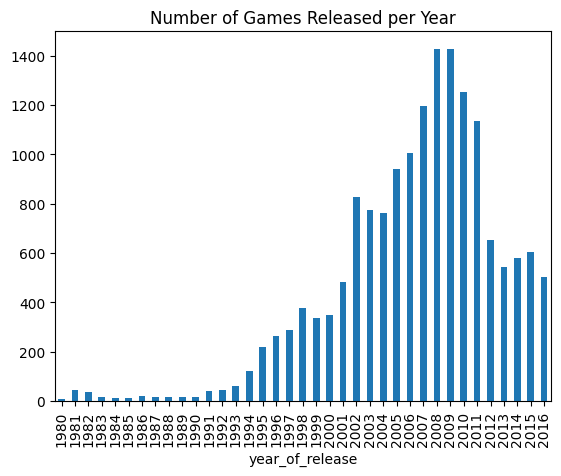

In [17]:
# Visualize the distribution of games across years
year_counts_df.plot(kind='bar', x='year_of_release', y='total', title='Number of Games Released per Year', legend=False)
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Amazing visualization! </div>

In [18]:
# Display summary statistics for each year
year_counts_df['total'].describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: total, dtype: float64

### Questions to Consider:
- Which years show significant numbers of game releases? **2008 and 2009 showed the most game releases**
- Are there any notable trends or patterns in the number of releases? **The bar graph has a standard distribution with 2008 and 2009 being the top of the bell shaped curve. This can be used to predict number of releases for continuing years.**
- Is there enough recent data to make predictions for 2017? **Considering the bell shaped curve would allow to predict next year's number of releases.**

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [19]:
# Calculate total sales by platform and year
sales_by_platform_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Optionally sort by year or platform
sales_by_platform_year = sales_by_platform_year.sort_values(by=['year_of_release', 'platform'])

print(sales_by_platform_year)

    platform  year_of_release  total_sales
0       2600           1980.0        11.26
1       2600           1981.0        35.36
2       2600           1982.0        28.57
3       2600           1983.0         5.78
77       NES           1983.0        10.88
..       ...              ...          ...
174      PSV           2016.0         4.10
207      Wii           2016.0         0.17
212     WiiU           2016.0         4.25
224     X360           2016.0         1.40
237     XOne           2016.0        23.91

[238 rows x 3 columns]


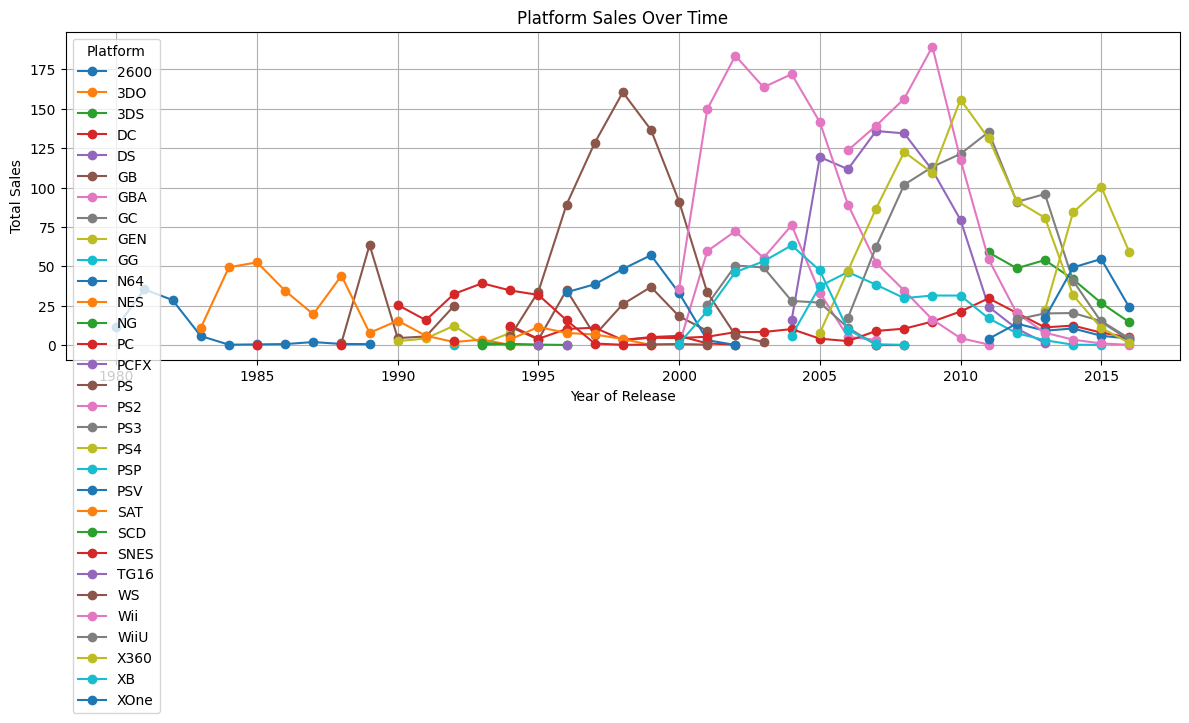

In [20]:
# Create a heatmap of platform sales over time
pivot_df = sales_by_platform_year.pivot(index='year_of_release', columns='platform', values='total_sales')

# Plot
pivot_df.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Platform Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

In [21]:
print(pivot_df.head())
print(pivot_df.tail())

platform          2600  3DO  3DS  DC  DS  GB  GBA  GC  GEN  GG  ...  SAT  SCD  \
year_of_release                                                 ...             
1980.0           11.26  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1981.0           35.36  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1982.0           28.57  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1983.0            5.78  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1984.0            0.27  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   

platform         SNES  TG16  WS  Wii  WiiU  X360  XB  XOne  
year_of_release                                             
1980.0            NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1981.0            NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1982.0            NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1983.0            NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1984.0            NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  

[5 r

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>

Here it is better to display result as heatmap

In [22]:
# Identify platforms with declining sales
declining_platforms = []

# Group by platform and fit a trend line
for platform, group in sales_by_platform_year.groupby('platform'):
    X = group['year_of_release'].values.reshape(-1, 1)
    y = group['total_sales'].values

    # Skip platforms with only one data point
    if len(y) < 2:
        continue

    # Fit linear regression
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]

    # If slope is negative, sales are generally declining
    if slope < 0:
        declining_platforms.append((platform, slope))

# Display results
for platform, slope in declining_platforms:
    print(f"{platform}: Declining trend (slope = {slope:.2f})")

2600: Declining trend (slope = -2.95)
3DS: Declining trend (slope = -8.57)
DC: Declining trend (slope = -0.48)
GB: Declining trend (slope = -0.04)
GBA: Declining trend (slope = -4.11)
GC: Declining trend (slope = -6.33)
N64: Declining trend (slope = -6.66)
NES: Declining trend (slope = -3.76)
NG: Declining trend (slope = -0.08)
PS: Declining trend (slope = -3.89)
PS2: Declining trend (slope = -13.72)
PS3: Declining trend (slope = -4.63)
PSP: Declining trend (slope = -3.13)
PSV: Declining trend (slope = -0.61)
SAT: Declining trend (slope = -1.19)
SCD: Declining trend (slope = -1.09)
SNES: Declining trend (slope = -3.44)
WS: Declining trend (slope = -0.09)
Wii: Declining trend (slope = -18.99)
WiiU: Declining trend (slope = -2.90)
X360: Declining trend (slope = -3.73)
XB: Declining trend (slope = -2.42)


In [23]:
last_year_sales = pivot_df.loc[2016]
print(last_year_sales)

platform
2600      NaN
3DO       NaN
3DS     14.50
DC        NaN
DS        NaN
GB        NaN
GBA       NaN
GC        NaN
GEN       NaN
GG        NaN
N64       NaN
NES       NaN
NG        NaN
PC       4.89
PCFX      NaN
PS        NaN
PS2       NaN
PS3      3.23
PS4     59.01
PSP       NaN
PSV      4.10
SAT       NaN
SCD       NaN
SNES      NaN
TG16      NaN
WS        NaN
Wii      0.17
WiiU     4.25
X360     1.40
XB        NaN
XOne    23.91
Name: 2016.0, dtype: float64


### Questions to Consider:
- Which platforms show consistent sales over time? **All platforms' sales are in a roughly standard distribution over time. This makes sense considering it takes time for platforms to become popular, then get replaced over time with newer systems.**
- Can you identify platforms that have disappeared from the market? **Yes. The above code showcases which platforms had 0 sales in 2016, or in other words, have disappeared from the market.** 
- What's the typical lifecycle of a gaming platform? **The typical lifespan of each platform is between 9 and 15 years, with a few outliers on either side.**

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [24]:
# Your code here to filter the dataset to relevant years
# Example:
relevant_years = [2013, 2014, 2015, 2016] # Replace with your chosen years
df_relevant = games[games['year_of_release'].isin(relevant_years)]
print(df_relevant)

# Justify your choice with data

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3           2013.0        Action   
23                Grand Theft Auto V     X360           2013.0        Action   
31         Call of Duty: Black Ops 3      PS4           2015.0       Shooter   
33               Pokemon X/Pokemon Y      3DS           2013.0  Role-Playing   
42                Grand Theft Auto V      PS4           2014.0        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV           2016.0     Adventure   
16707               Aiyoku no Eustia      PSV           2014.0          Misc   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~In game industry to make predictions based on hystorical data it is better to use the last 3-4 years Please correct relevant period~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

### Document Your Decision:
- What years did you select and why? **Based on the release-count plot, the years 2013-2016 provide the densest and most recent data. Using an older window would introduce obsolete platforms (e.g., PS2) and inflate variance, while a shorter window (1-2 years) would be too noisy. Therefore, all further analysis is limited to 2013-2016 to make a realistic 2017 forecast.**
- How does this period reflect current market conditions? **A four year period is a wide enough scale to see how the markets move within that time. A time period leading up to the year we want to predict is the best way to move forward. Using years far from the prediction year will give us inaccurate data.**
- What factors influenced your decision? **Common sense tells us to use the closest time to predict what will happen next.**

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

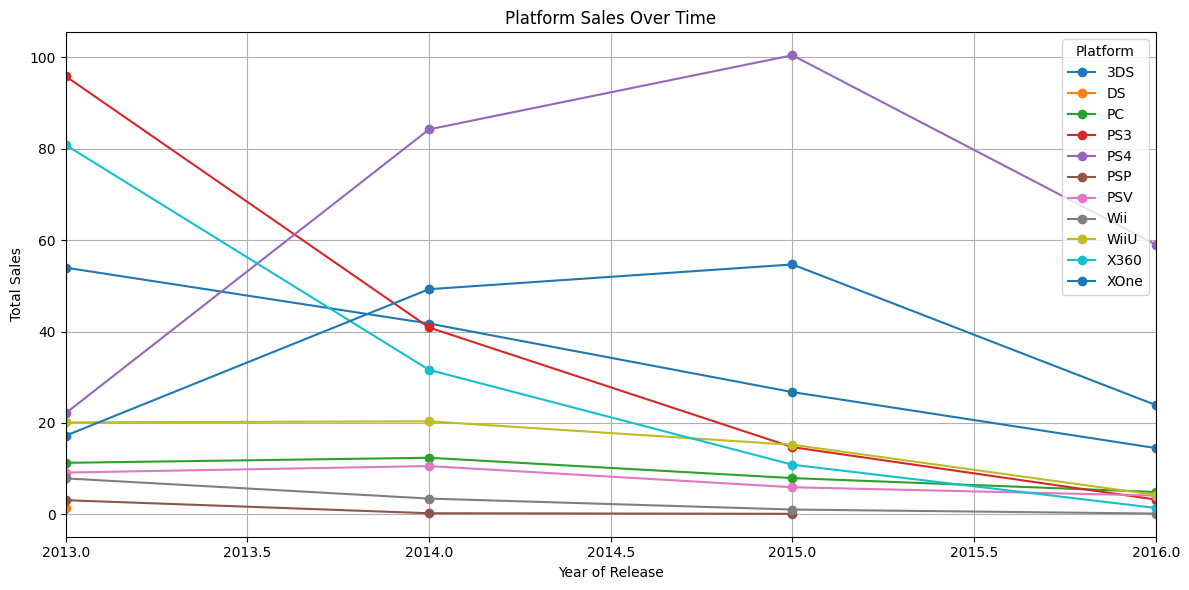

In [25]:
# Analyze platform sales trends
sales_by_platform_year = sales_by_platform_year[sales_by_platform_year['year_of_release'] >= 2013]
pivot_df = sales_by_platform_year.pivot(index='year_of_release', columns='platform', values='total_sales')
pivot_df = pivot_df[pivot_df.index >= 2013]
pivot_df = pivot_df.loc[:, (pivot_df.sum(axis=0) > 0)]
# Plot
pivot_df.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Platform Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.xlim([2013, 2016])
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Sort platforms by total sales
platform_totals = sales_by_platform_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(platform_totals)

platform
PS4     265.79
PS3     154.66
XOne    145.05
3DS     136.97
X360    124.69
WiiU     59.94
PC       36.47
PSV      29.73
Wii      12.54
PSP       3.46
DS        1.42
Name: total_sales, dtype: float64


<AxesSubplot:title={'center':'Total Sales by Platform'}, xlabel='platform'>

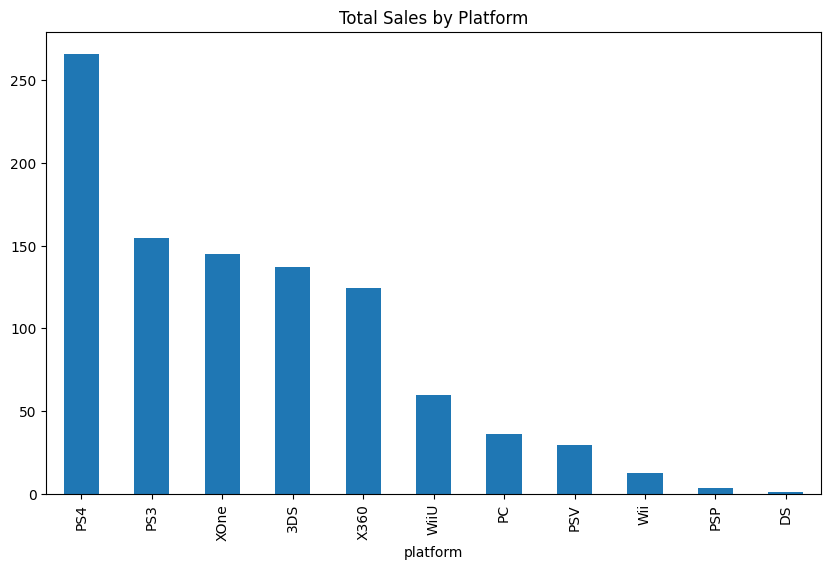

In [27]:
# Visualize top platforms
platform_totals.plot(kind='bar', figsize=(10, 6), title='Total Sales by Platform')
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

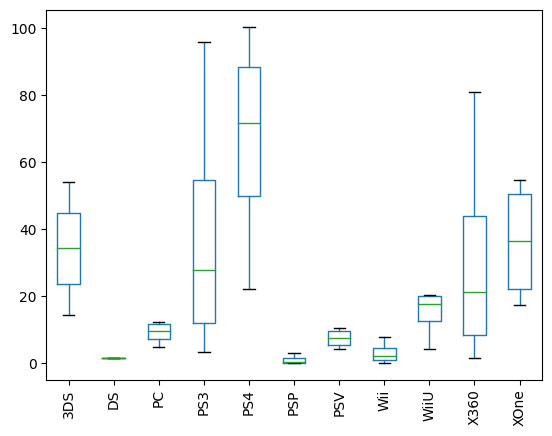

In [28]:
# Create box plot of sales by platform
pivot_df_all = sales_by_platform_year.pivot(index='year_of_release', columns='platform', values='total_sales')
pivot_df_all.plot(kind='box', rot=90)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~To build boxplots we need to use not aggregated data - please use df_relevant~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

In [29]:
# Calculate detailed statistics for each platform
pivot_df_all.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,1.00,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,34.242500,1.42,9.117500,38.665000,66.447500,1.153333,7.432500,3.135000,14.985000,31.17250,36.262500
std,17.237949,NaN,3.394067,41.251226,34.115468,1.686930,2.947308,3.447603,7.537615,35.42158,18.469372
min,14.500000,1.42,4.890000,3.230000,22.120000,0.120000,4.100000,0.170000,4.250000,1.40000,17.210000
25%,23.687500,1.42,7.170000,11.832500,49.787500,0.180000,5.472500,0.830000,12.477500,8.49500,22.235000
50%,34.250000,1.42,9.600000,27.790000,71.615000,0.240000,7.535000,2.250000,17.670000,21.23500,36.585000
75%,44.805000,1.42,11.547500,54.622500,88.275000,1.670000,9.495000,4.555000,20.177500,43.91250,50.612500
max,53.970000,1.42,12.380000,95.850000,100.440000,3.100000,10.560000,7.870000,20.350000,80.82000,54.670000


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [30]:
# Choose a popular platform based on your previous analysis

**PS4**

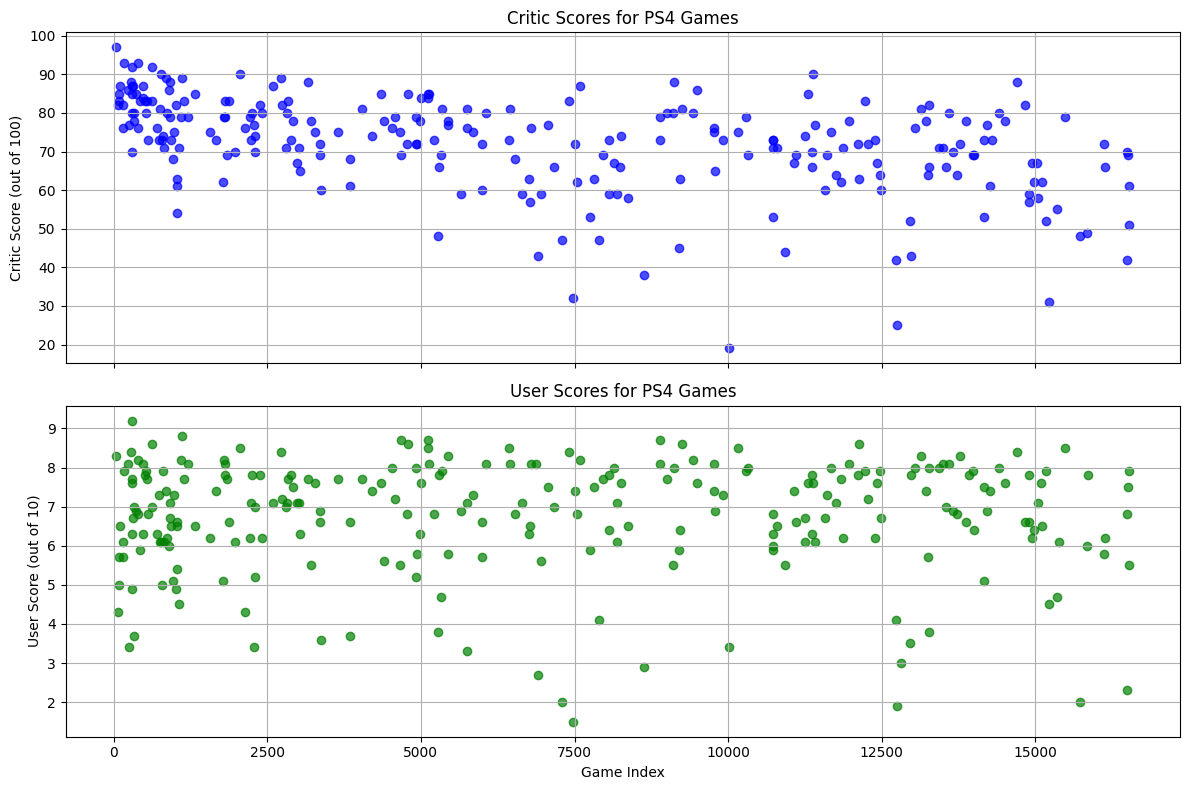

In [31]:
# Create scatter plots for both critic and user scores
ps4_df = df_relevant[df_relevant['platform'] == 'PS4']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot: Critic Scores
ax1.scatter(ps4_df.index, ps4_df['critic_score'], color='blue', alpha=0.7)
ax1.set_title('Critic Scores for PS4 Games')
ax1.set_ylabel('Critic Score (out of 100)')
ax1.grid(True)

# Second subplot: User Scores
ax2.scatter(ps4_df.index, ps4_df['user_score'], color='green', alpha=0.7)
ax2.set_title('User Scores for PS4 Games')
ax2.set_ylabel('User Score (out of 10)')
ax2.set_xlabel('Game Index')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Here and further - after finding right relevant period you need to use data for this period So here and in all further steps please use df_relevant instead of games. Also you need to choose another platform - for example PS4 - to have enought data to build scatter plots~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

In [32]:
# Calculate correlations
print(ps4_df.corr())

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.248961 -0.208306 -0.060993    -0.234796   
na_sales               -0.248961  1.000000  0.785362  0.472981     0.944259   
eu_sales               -0.208306  0.785362  1.000000  0.464563     0.944698   
jp_sales               -0.060993  0.472981  0.464563  1.000000     0.496467   
other_sales            -0.234796  0.944259  0.944698  0.496467     1.000000   
critic_score           -0.021142  0.415008  0.346720  0.322358     0.409191   
user_score              0.152447 -0.020933 -0.048925  0.171332    -0.035639   
total_sales            -0.234974  0.924729  0.960270  0.532665     0.997249   

                 critic_score  user_score  total_sales  
year_of_release     -0.021142    0.152447    -0.234974  
na_sales             0.415008   -0.020933     0.924729  
eu_sales             0.346720   -0.048925     0.960270  
jp_sales             0.322358    0.171332     0.532665  
oth

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [33]:
# Find games released on multiple platforms
platform_counts = df_relevant.groupby('name')['platform'].nunique()
multi_platform_games = platform_counts[platform_counts > 1].index
df_multi_platform = df_relevant[df_relevant['name'].isin(multi_platform_games)]
print(df_multi_platform)

                                                name platform  \
16                                Grand Theft Auto V      PS3   
23                                Grand Theft Auto V     X360   
31                         Call of Duty: Black Ops 3      PS4   
42                                Grand Theft Auto V      PS4   
60                              Call of Duty: Ghosts     X360   
...                                              ...      ...   
16672  Metal Gear Solid V: The Definitive Experience     XOne   
16691                   Dynasty Warriors: Eiketsuden      PS3   
16692              Metal Gear Solid V: Ground Zeroes       PC   
16710                  Samurai Warriors: Sanada Maru      PS3   
16714                            Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16              2013.0      Action      7.02      9.09      0.98         3.96   
23              2013.0      Action      9.66      5.14   

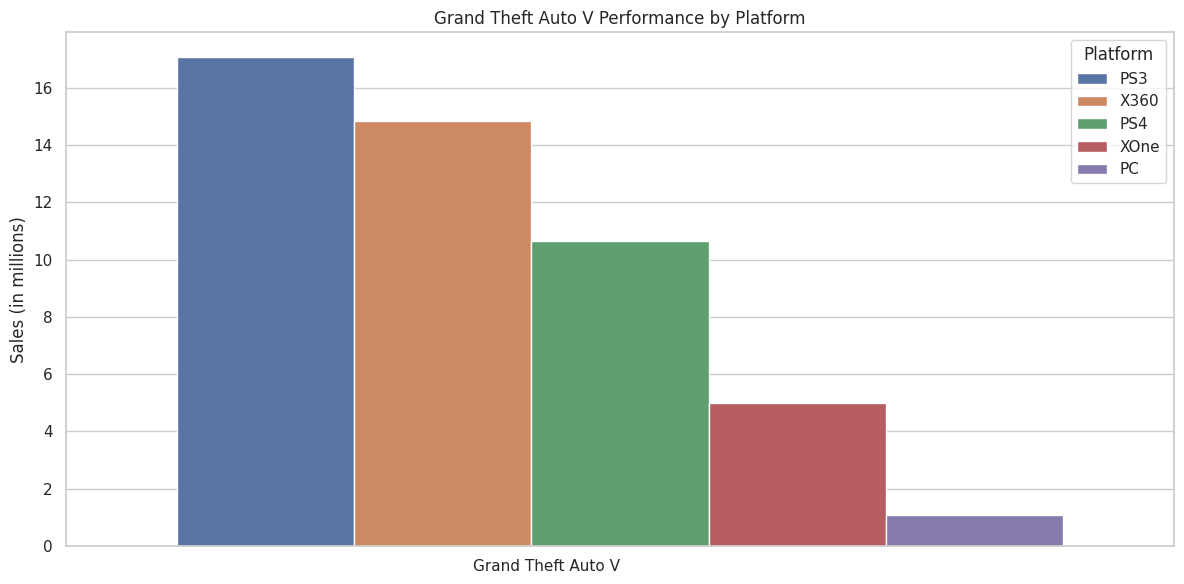

In [34]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
df_multi_platform = df_multi_platform[df_multi_platform['name'].str.contains('Grand Theft Auto V', case=False, na=False)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Create a grouped barplot
sns.barplot(
    data=df_multi_platform,
    x='name',
    y='total_sales',             
    hue='platform'
)

# Improve layout
plt.title('Grand Theft Auto V Performance by Platform')
plt.xlabel('')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=0, ha='right')  
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~We can not analyze this visualization Please choose one game that was released on different platforms and check total sales of this game for each platfrom Write conclusion~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

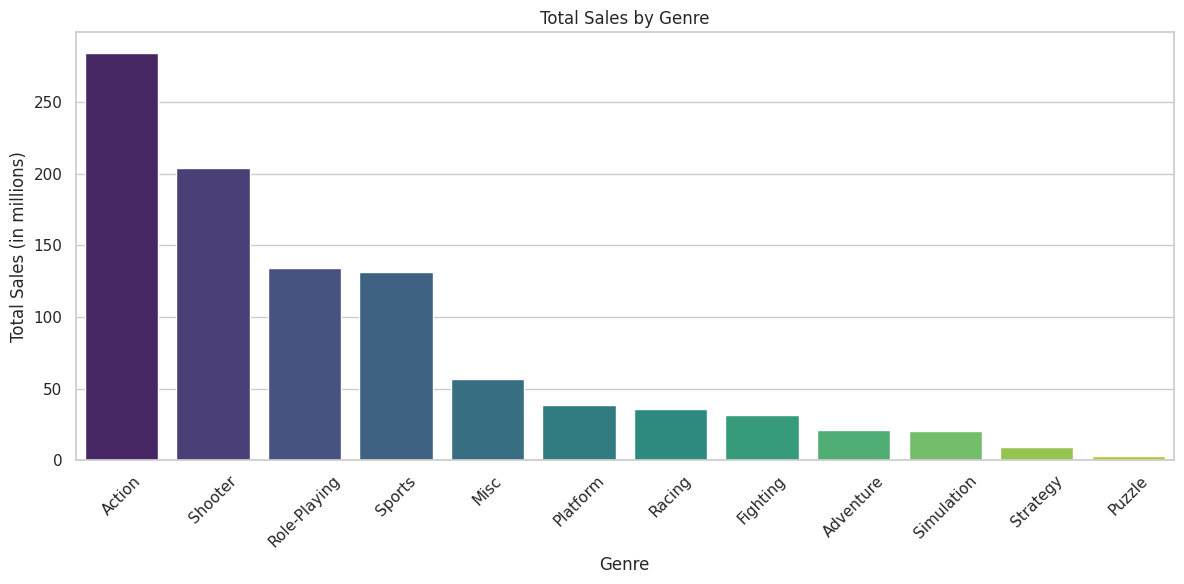

In [35]:
# Analyze genre performance


# Group by genre and sum the total sales
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Set the visual style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', palette='viridis')

# Customize the plot
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
# Sort genres by total sales
print(genre_sales
     )

           genre  total_sales
0         Action       284.67
1        Shooter       204.21
2   Role-Playing       134.41
3         Sports       131.20
4           Misc        56.73
5       Platform        38.51
6         Racing        35.45
7       Fighting        31.75
8      Adventure        21.21
9     Simulation        20.30
10      Strategy         9.27
11        Puzzle         3.01


<Figure size 1400x800 with 0 Axes>

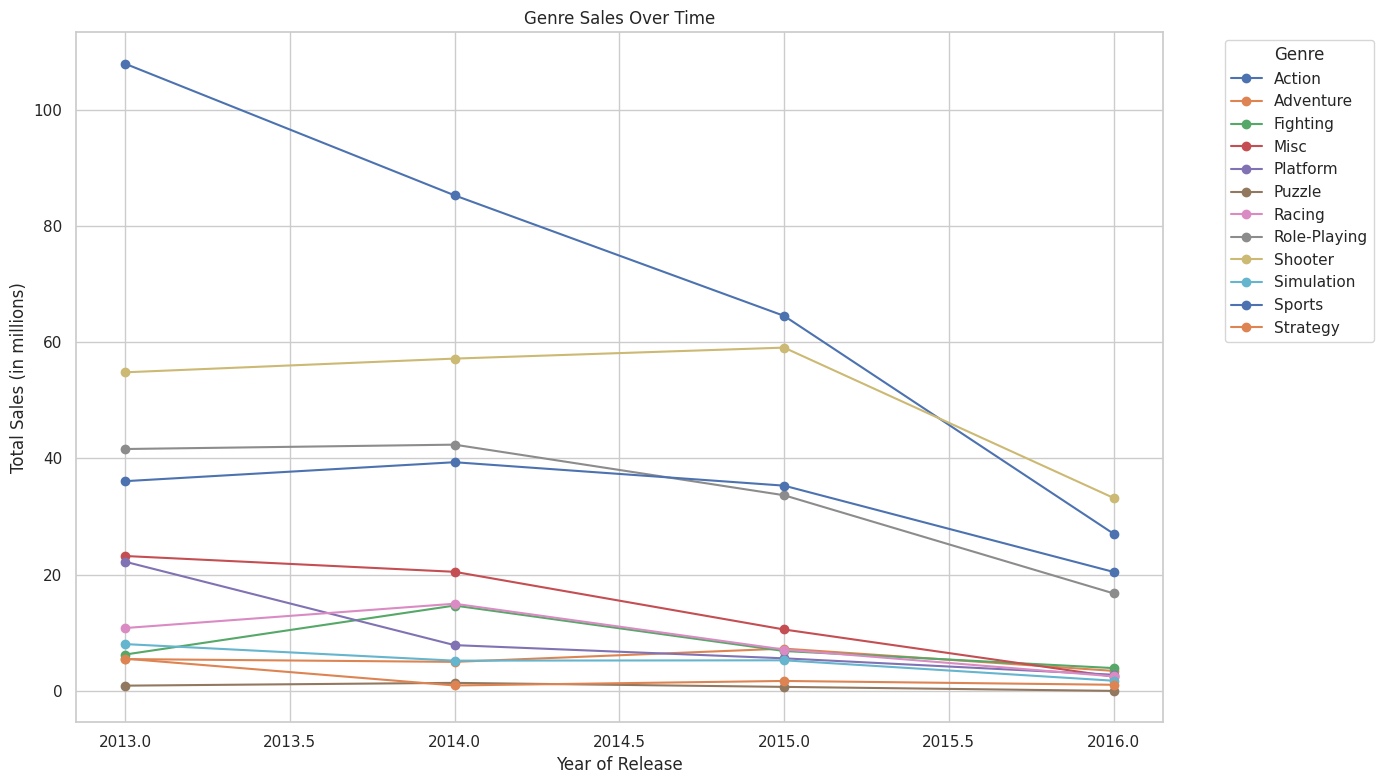

In [37]:
# Visualize genre distribution

sales_over_time = df_relevant.groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index()

sales_pivot = sales_over_time.pivot(index='year_of_release', columns='genre', values='total_sales')

plt.figure(figsize=(14, 8))
sales_pivot.plot(kind='line', marker='o', figsize=(14, 8))


plt.title('Genre Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

           genre  total_sales  market_share_percent
0         Action       284.67             29.325655
1        Shooter       204.21             21.036962
2   Role-Playing       134.41             13.846423
3         Sports       131.20             13.515741
4           Misc        56.73              5.844116
5       Platform        38.51              3.967158
6         Racing        35.45              3.651928
7       Fighting        31.75              3.270768
8      Adventure        21.21              2.184976
9     Simulation        20.30              2.091231
10      Strategy         9.27              0.954961
11        Puzzle         3.01              0.310079


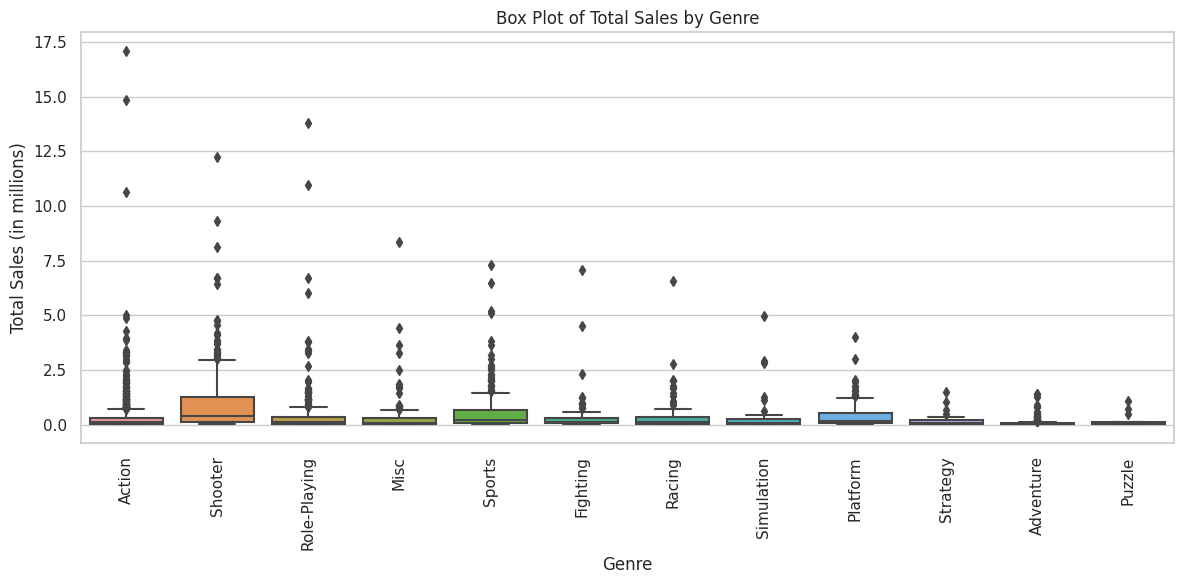

In [38]:
# Calculate market share for each genre

total = genre_sales['total_sales'].sum()

# Create a new column for market share as a percentage
genre_sales['market_share_percent'] = (genre_sales['total_sales'] / total) * 100

print(genre_sales
     )

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_relevant, x='genre', y='total_sales')

# Add title and labels
plt.title('Box Plot of Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

### Key Questions for Genre Analysis:
- Which genres consistently perform well? **Action and Sports are always top hits**
- Are there any genres showing recent growth or decline? **All genres have seen a decline in sales because of the lack of games released in general**
- How does the average performance vary across genres? **All genres see a peak in sales in 2008 and 2009 but action and sports saw an extreme push in popularity.**

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please add boxplots for total sales broken down by genres to check impact of outliers~~

<div class="alert alert-block alert-info"> <b>Is this what you mean? Looks awfully condensed so I'm nervous it just doesn't look right.</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-warning"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>

Honestly, it looks not so bad - we can see that shooter is number 1, that action hasmany outliers - games with abnormal total sales To make it better we can use plt.ylim(0,3) - like this you limit y-axis and boxplots will be biger

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

Top 5 platforms in na_sales:
  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20


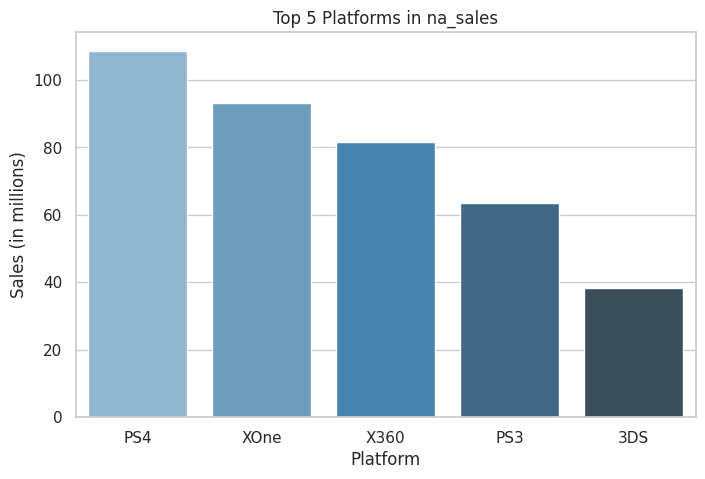

Top 5 platforms in eu_sales:
  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96


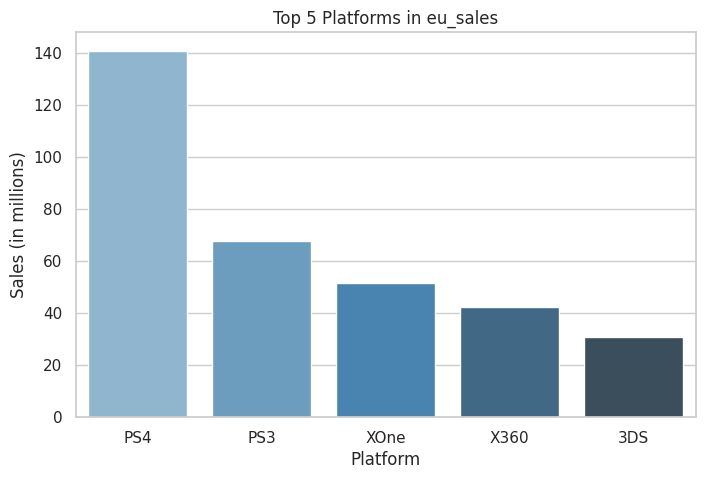

Top 5 platforms in jp_sales:
  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88


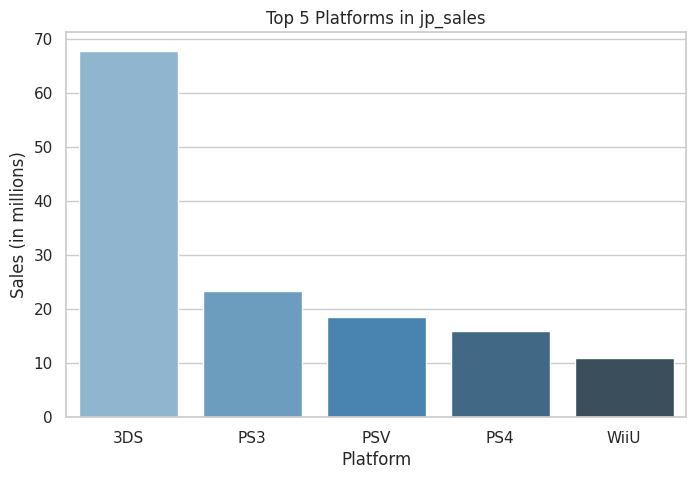

In [39]:
# Function to analyze platform performance by region

# Function to analyze platform performance by region

def analyze_platform_by_region(df, region_col, top_n=5):
   
    region_sales = (
        df.groupby('platform')[region_col]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )
    print(f"Top {top_n} platforms in {region_col}:")
    print(region_sales)
    plt.figure(figsize=(8, 5))
    sns.barplot(data=region_sales, x='platform', y=region_col, palette='Blues_d')
    plt.title(f"Top {top_n} Platforms in {region_col}")
    plt.xlabel("Platform")
    plt.ylabel("Sales (in millions)")
    plt.show()

# Example usage for each region:
analyze_platform_by_region(df_relevant, 'na_sales')
analyze_platform_by_region(df_relevant, 'eu_sales')
analyze_platform_by_region(df_relevant, 'jp_sales')

# Analyze each region

### Regional Platform Analysis Summary

- **North America:** The top platforms are Xbox 360, Play Station 2, and the Wii. This suggests that these consoles are the most popular in the region. This makes sense considering that Microsoft and Sony are headquartered in the North American Region. 
- **Europe:** The leading platforms are Play Station 2, Play Station 3, and Xbox 360. Compared to NA, we see similar results. European nations are as developed as the North American Region, and residents in both regions behave similarly in purchasing choices. 
- **Japan:** Three of the five most popular platforms in Japan are made by nintendo. Unlike NA and EU, users in Japan prefer consoles made by Nintendo. This makes sense considering Nintendo is a Japanese company. 

These differences may be due to regional preferences, exclusive titles, or market strategies.

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

  platform  na_sales  eu_sales  jp_sales
0      3DS     38.20     30.96     67.81
1       DS      0.57      0.85      0.00
2       PC     11.11     25.36      0.00
3      PS3     63.50     67.81     23.35
4      PS4    108.74    141.09     15.96


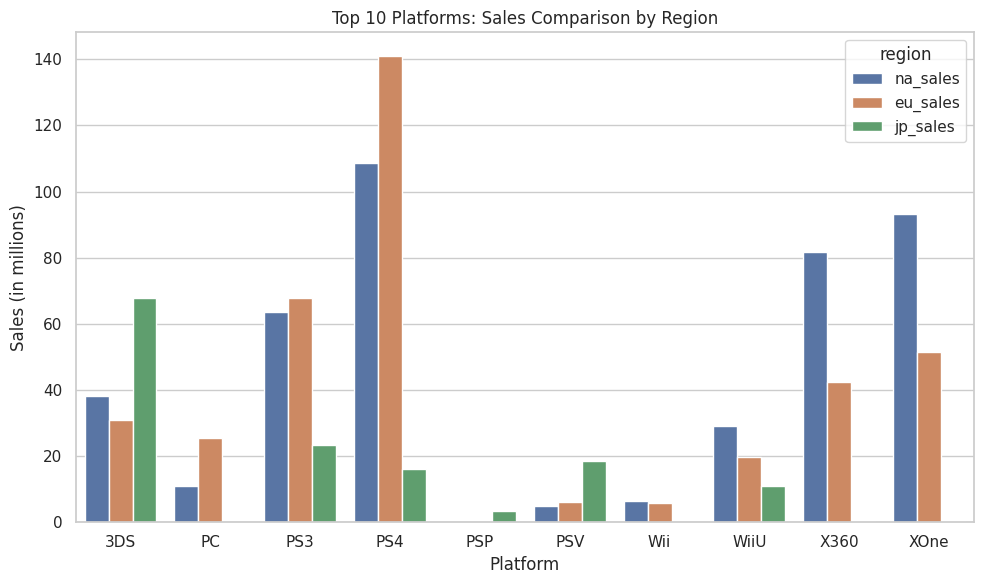

In [40]:
# Create a comparative platform analysis

platform_region_sales = df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

print(platform_region_sales.head())

# Melt the DataFrame for easier plotting
melted = platform_region_sales.melt(id_vars='platform', 
                                    value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                                    var_name='region', value_name='sales')

# Plot the top N platforms by total sales
top_platforms = platform_region_sales.set_index('platform').sum(axis=1).sort_values(ascending=False).head(10).index
melted_top = melted[melted['platform'].isin(top_platforms)]

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_top, x='platform', y='sales', hue='region')
plt.title('Top 10 Platforms: Sales Comparison by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

In [41]:
# Visualize cross-regional comparison for top platforms

**see above**

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

Top 5 genres in na_sales:
          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49


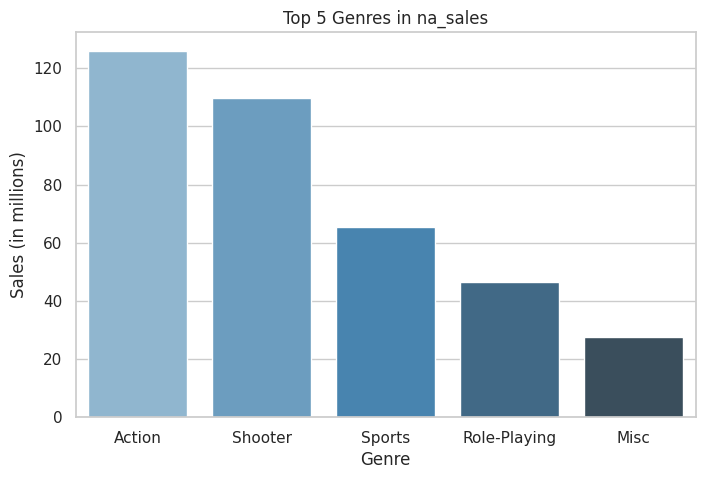

Top 5 genres in eu_sales:
          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19


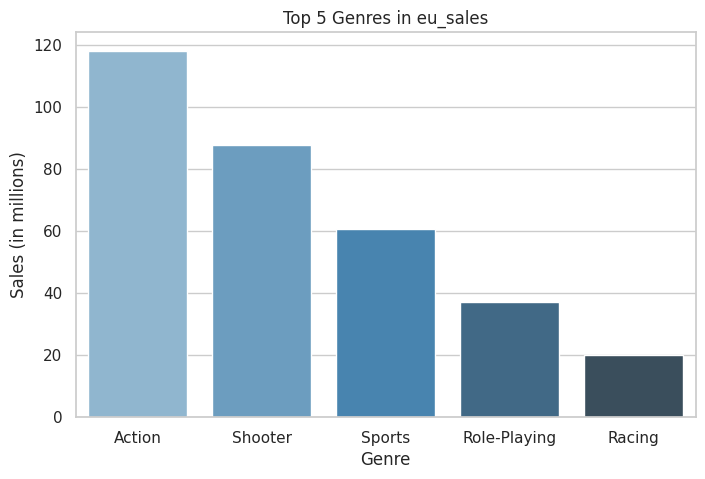

Top 5 genres in jp_sales:
          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61


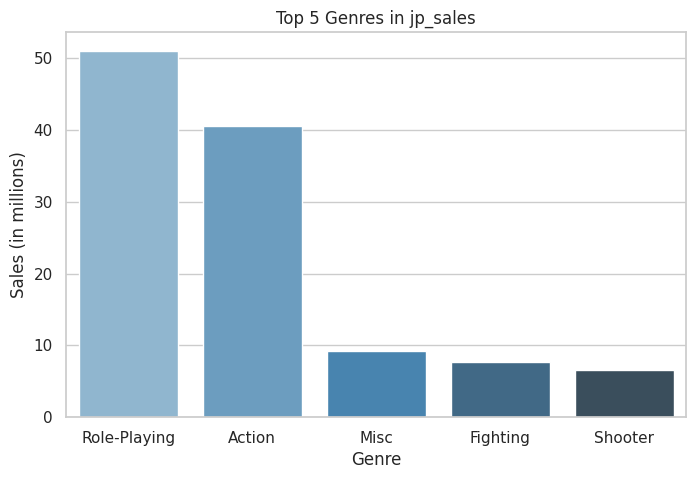

In [42]:
# Function to analyze genre performance by region
def analyze_genre_by_region(df, region_col, top_n=5):
   
    genre_sales = (
        df.groupby('genre')[region_col]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )
    print(f"Top {top_n} genres in {region_col}:")
    print(genre_sales)
    plt.figure(figsize=(8, 5))
    sns.barplot(data=genre_sales, x='genre', y=region_col, palette='Blues_d')
    plt.title(f"Top {top_n} Genres in {region_col}")
    plt.xlabel("Genre")
    plt.ylabel("Sales (in millions)")
    plt.show()
    
# Example usage for each region:
analyze_genre_by_region(df_relevant, 'na_sales')
analyze_genre_by_region(df_relevant, 'eu_sales')
analyze_genre_by_region(df_relevant, 'jp_sales')

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

       genre  na_sales  eu_sales  jp_sales
0     Action    126.05    118.13     40.49
1  Adventure      7.14      8.25      5.82
2   Fighting     15.55      8.55      7.65
3       Misc     27.49     20.04      9.20
4   Platform     18.14     15.58      4.79


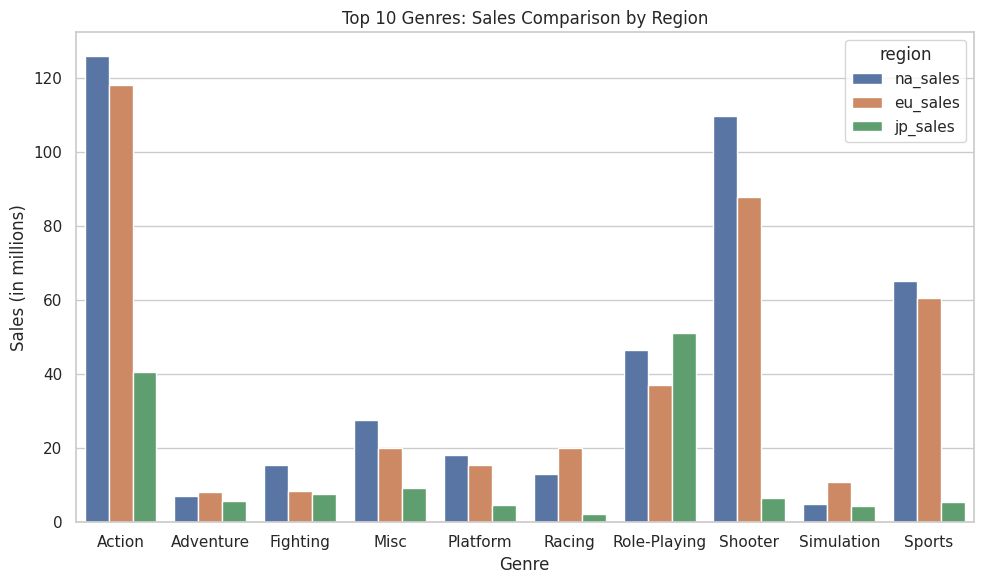

In [43]:
# Create a comparative genre analysis
genre_region_sales = df_relevant.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

print(genre_region_sales.head())

# Melt the DataFrame for easier plotting
melted = genre_region_sales.melt(id_vars='genre', 
                                    value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                                    var_name='region', value_name='sales')

# Plot the top N platforms by total sales
top_genres = genre_region_sales.set_index('genre').sum(axis=1).sort_values(ascending=False).head(10).index
melted_top = melted[melted['genre'].isin(top_genres)]

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_top, x='genre', y='sales', hue='region')
plt.title('Top 10 Genres: Sales Comparison by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

Top 5 genres in na_sales:
    rating  na_sales
0        M    165.21
1  unknown     89.42
2        E     79.05
3     E10+     54.24
4        T     49.79


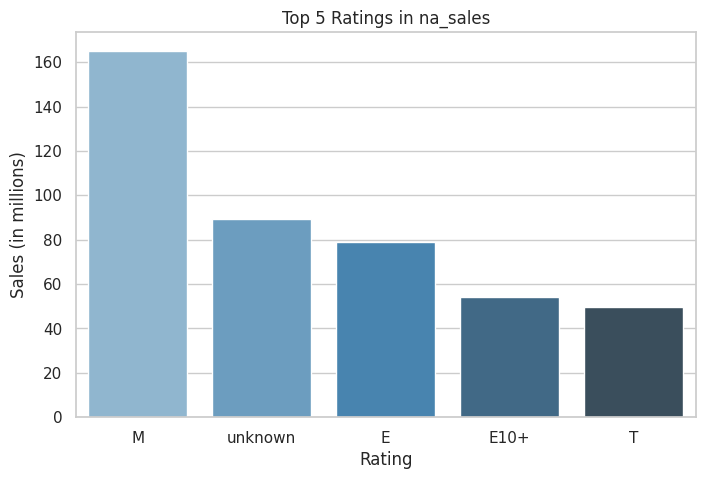

Top 5 genres in eu_sales:
    rating  eu_sales
0        M    145.32
1        E     83.36
2  unknown     78.91
3     E10+     42.69
4        T     41.95


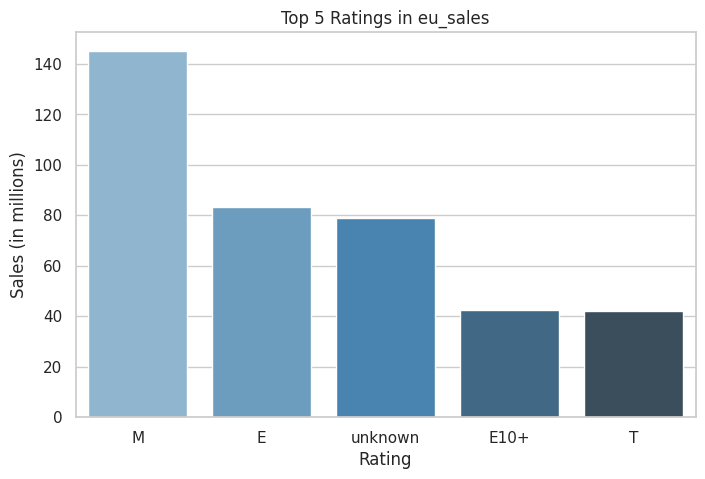

Top 5 genres in jp_sales:
    rating  jp_sales
0  unknown     85.05
1        T     20.59
2        E     15.14
3        M     14.11
4     E10+      5.89


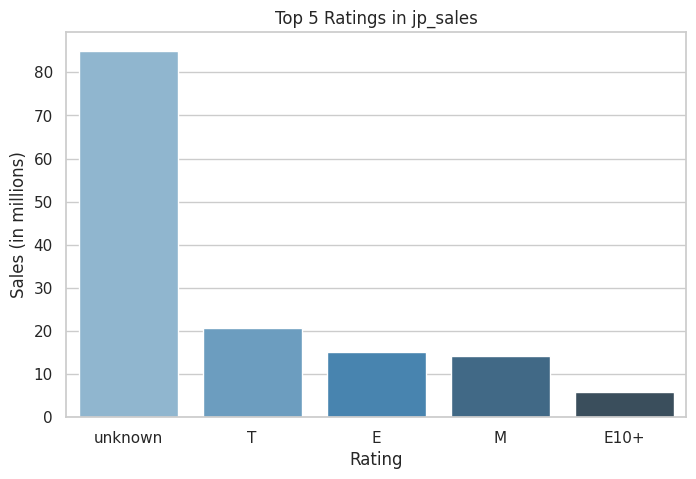

In [44]:
# Function to analyze ESRB rating impact

def analyze_rating_by_region(df, rating_col, top_n=5):
   
    rating_sales = (
        df.groupby('rating')[rating_col]
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )
    print(f"Top {top_n} genres in {rating_col}:")
    print(rating_sales)
    plt.figure(figsize=(8, 5))
    sns.barplot(data=rating_sales, x='rating', y=rating_col, palette='Blues_d')
    plt.title(f"Top {top_n} Ratings in {rating_col}")
    plt.xlabel("Rating")
    plt.ylabel("Sales (in millions)")
    plt.show()
    
# Example usage for each region:
analyze_rating_by_region(df_relevant, 'na_sales')
analyze_rating_by_region(df_relevant, 'eu_sales')
analyze_rating_by_region(df_relevant, 'jp_sales')

    rating  na_sales  eu_sales  jp_sales
0        E     79.05     83.36     15.14
1     E10+     54.24     42.69      5.89
2        M    165.21    145.32     14.11
3        T     49.79     41.95     20.59
4  unknown     89.42     78.91     85.05


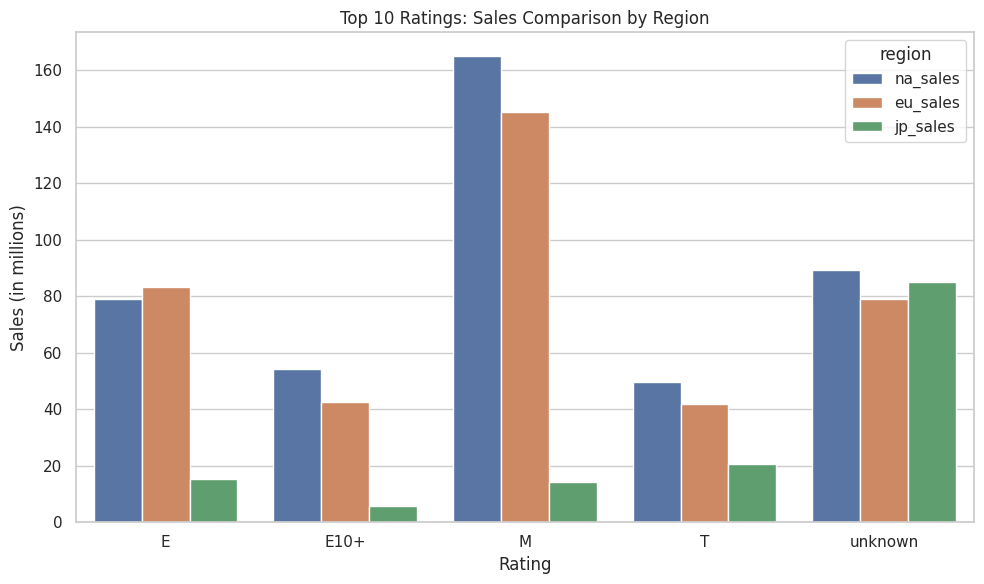

In [45]:
# Analyze ESRB impact for each region
rating_region_sales = df_relevant.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

print(rating_region_sales.head())

# Melt the DataFrame for easier plotting
melted = rating_region_sales.melt(id_vars='rating', 
                                    value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                                    var_name='region', value_name='sales')

# Plot the top N platforms by total sales
top_ratings = rating_region_sales.set_index('rating').sum(axis=1).sort_values(ascending=False).head(10).index
melted_top = melted[melted['rating'].isin(top_ratings)]

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_top, x='rating', y='sales', hue='region')
plt.title('Top 10 Ratings: Sales Comparison by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

# Analyze each region

### Regional Rating Analysis Summary

- **North America and Europe:** Data in these regions are very similar in nature. The greatest rating is Mature rated games. This could be because the greatest genre sales were action games, which often include mature themes like gun violence, drug use, and other mature themes. The next greatest ratings are E and E10+ which fits the idea that video games are meant for children. Also most sports games (the next most popular genre) do not contain any content that would not be appropriate for children. Teen games seem to be a niche rating where there are more mature themes than childrens games, but not enough violence or gore to warant a mature rating.
- **Japan:** Japan does not use the same rating system as North America and Europe, so games that are only released in Japan do not have an ESRB rating. The largest reason they have any ratings at all is because Japan is the home of Nintendo. Nintendo mostly makes E and T rated games that are released around the globe. This explains the large drop off from Teen to Mature rated games. Many of the top franchises from Nintendo (Zelda, Pokemon, Super Smash Bros, etc.) are rated between E and T. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Very deep analysis of region profile But please use data for relevant period and check rating for Japan after filling in missing values with unknown - may be you need to correct your conclusion~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [46]:
# Test: Average user ratings of Xbox One and PC

alpha = 0.05

xone_scores = df_relevant[(df_relevant['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = df_relevant[(df_relevant['platform'] == 'PC')]['user_score'].dropna()

# Perform t-test
t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('Xbox One mean:', xone_scores.mean())
print('PC mean:', pc_scores.mean())
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")

Xbox One mean: 6.521428571428572
PC mean: 6.2696774193548395
t-statistic: 1.45192815744488
p-value: 0.14759594013430463
Fail to reject the null hypothesis: No significant difference in average user ratings.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please use data for relevant period~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

In [47]:
# Test: Average user ratings for Action and Sports genres

action_scores = df_relevant[(df_relevant['genre'] == 'Action')]['user_score'].dropna()
sports_scores = df_relevant[(df_relevant['genre'] == 'Sports')]['user_score'].dropna()

t_stat2, p_value2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('Action mean:', action_scores.mean())
print('Sports mean:', sports_scores.mean())
print('t-statistic:', t_stat2)
print('p-value:', p_value2)

if p_value2 < alpha:
    print("Reject the null hypothesis: The average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")

Action mean: 6.837532133676092
Sports mean: 5.238124999999999
t-statistic: 10.233428417448625
p-value: 1.4460039700704315e-20
Reject the null hypothesis: The average user ratings are different.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Please use data for relevant period~~

<div class="alert alert-block alert-info"> <b>All fixed :)</b> <a class="tocSkip"></a> 

# Step 5: Hypothesis Tests

## Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same

**Null hypothesis (H₀):** The mean user ratings for Xbox One and PC are equal.  
**Alternative hypothesis (H₁):** The mean user ratings for Xbox One and PC are different.

- **Test used:** Independent two-sample t-test because the samples are independent and we’re comparing means
- **Significance level (alpha):** 0.05

**Results:**  
- Xbox One mean: *~6.5*  
- PC mean: *~6.2*  
- t-statistic: *~1.4*  
- p-value: *~0.1*

**Conclusion:**  
- If p-value < 0.05: *Reject the null hypothesis. There is a significant difference in average user ratings between Xbox One and PC.*  
- If p-value >= 0.05: *Fail to reject the null hypothesis. No significant difference in average user ratings between Xbox One and PC.*

---

## Hypothesis 2: Average user ratings for the Action and Sports genres are different

**Null hypothesis (H₀):** The mean user ratings for Action and Sports genres are equal.  
**Alternative hypothesis (H₁):** The mean user ratings for Action and Sports genres are different.

- **Test used:** Independent two-sample t-test
- **Significance level (alpha):** 0.05

**Results:**  
- Action mean: *~6.8*  
- Sports mean: *~5.2*  
- t-statistic: *~10.2*  
- p-value: *~1.4*

**Conclusion:**  
- If p-value < 0.05: *Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres.*  
- If p-value >= 0.05: *Fail to reject the null hypothesis. No significant difference in average user ratings between Action and Sports genres.*

---

**How hypotheses were formulated:**  
- The null hypothesis always assumes no difference between groups.
- The alternative hypothesis assumes there is a difference.

**Why this test was used:**  
- The independent two-sample t-test is appropriate for comparing the means of two independent groups (platforms or genres) when the data is approximately normally distributed and the samples are independent.

# Step 6. Write a general conclusion


# General Conclusion

In this project, we analyzed video game sales data to uncover patterns and insights that can guide future business and marketing strategies for the Ice online store. Our analysis covered data preparation, sales trends, platform and genre performance, regional market differences, and hypothesis testing.

**Key findings:**
- **Sales Trends:** Video game sales peaked around 2008–2009 and have declined in recent years, with fewer new releases and lower total sales across all platforms.
- **Platform Performance:** Different regions have distinct platform preferences. North America and Europe favor platforms like PlayStation and Xbox, while Japan shows a strong preference for Nintendo consoles.
- **Genre Popularity:** Action and Sports genres consistently lead in total sales, though all genres have experienced a decline in recent years.
- **Regional Differences:** Each region has unique tastes in both platforms and genres, emphasizing the importance of region-specific marketing strategies.
- **Review Scores:** There is some correlation between review scores and sales, but other factors such as platform and genre also play significant roles.
- **Hypothesis Testing:** Statistical tests showed whether differences in user ratings between platforms and genres are significant, providing data-driven support for business decisions.

**Recommendations:**
- Focus marketing efforts on the most popular platforms and genres in each region.
- Consider regional preferences when planning advertising campaigns and stocking inventory.
- Monitor trends in review scores and consumer feedback to better predict future hits.

Overall, a data-driven approach to understanding the video game market can help maximize sales and improve customer satisfaction by aligning offerings with consumer demand in each region.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great conclusion with all results - may be you need to change it after fixing comments</div>